<a href="https://colab.research.google.com/github/mbaliu-treino/Desenvolve/blob/main/LEARN_C_DS_DeepLearning_Rede_Neural_com_Numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color=orange><b>Regressão: implemente uma rede neural com numpy</b></font>

<font color=gray size=2><a href=https://colab.research.google.com/drive/1j-c9deeieWMZnCeR8h5QoenlCnMbD1ZM>Arquivo Colab</a></font>

<ul><font size=2 color=gray>FICHA TÉCNICA
<li><a href=https://cursos.alura.com.br/course/rede-neural-numpy><font size=2 color=gray>Regressão: implemente uma rede neural com numpy</a>
<li>Carga Horária: 7 h
<li>Instrutora: Allan Spadini
<li>Data de Início: 09-2022
</ul>

<hr color=gray><br>
<h3><b>Conteúdo / Aprendizagem:</b></h3>

- 

# <font color=orange>RESUMO</font>

<a href=https://docs.google.com/spreadsheets/d/1tTygYlq9r7nkUsw9a25N5_z57-de_59tSBCIVPw6KUw><font size=2 color=gray>ROTEIROS Data Science</font></a>

* <font color=orange><b>

* 

# <font color=orange>**CURSO**</font>

**Projeto**: neste curso é abordado um caso hipotético de uma análise das análises de uma empresa de mobilidade urbana com bicicletas alugadas. 


<font color=orange><b></b></font>


> A base de dados que estamos usando foi baseada na Bike Sharing Dataset, obtida a partir de sistemas de compartilhamento de bicicletas que são formas diferentes de aluguel de bicicletas, em que o processo de associação, locação e devolução é automático. Assim, um usuário pode alugar uma bicicleta a partir de uma determinada posição e retornar em outra posição. Os dados provenientes desses sistemas são muito interessantes para pesquisas em ciência de dados e aprendizagem de máquina (o famoso machine learning). Além das informações usadas no curso, são registradas informações relacionada à posição de partida e chegada de cada usuário. O que não ocorre em outras formas de transporte como ônibus e metrô. Isso faz com que o sistema de compartilhamento de bicicletas seja uma forma eficiente de estudar a mobilidade na cidade.

> No artigo de Fanaee-T. e Gama (2013), essa base de dados foi usada para estudar um algoritmo de rotulagem de eventos. Por exemplo, se ocorreu um empréstimo de bicicleta ou não. Os resultados mostraram que o algoritmo proposto pode ser uma alternativa viável na falta de humanos treinados no assunto.

Referência bibliográfica

Fanaee-T., Hadi, and Gama, João. 'Event labeling combining ensemble detectors and background knowledge', Progress in Artificial Intelligence (2013): pp. 1-15, Springer Berlin Heidelberg. doi:10.1007/s13748-013-0040-3

<a href=https://github.com/alura-cursos/redes-neurais/archive/allanspadini-aula-5.zip><font size=2; color=gray>Material de referencial do curso</a></font>

## <font color=orange><b>Carga de dados</b></font>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Download dos dados
data_uri = 'https://github.com/alura-cursos/redes-neurais/archive/allanspadini-aula-1.zip'

!wget $data_uri
!unzip /content/allanspadini-aula-1.zip

--2022-09-04 18:16:31--  https://github.com/alura-cursos/redes-neurais/archive/allanspadini-aula-1.zip
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/alura-cursos/redes-neurais/zip/refs/heads/allanspadini-aula-1 [following]
--2022-09-04 18:16:31--  https://codeload.github.com/alura-cursos/redes-neurais/zip/refs/heads/allanspadini-aula-1
Resolving codeload.github.com (codeload.github.com)... 140.82.121.9
Connecting to codeload.github.com (codeload.github.com)|140.82.121.9|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘allanspadini-aula-1.zip’

allanspadini-aula-1     [ <=>                ]   6.04K  --.-KB/s    in 0.001s  

2022-09-04 18:16:32 (5.17 MB/s) - ‘allanspadini-aula-1.zip’ saved [6186]

Archive:  /content/allanspadini-aula-1.zip
194fc7bbc9d83beae2c657b

In [3]:
# Leitura no Pandas
dados = pd.read_csv('/content/redes-neurais-allanspadini-aula-1/Bicicletas.csv')
dados.sample(5)

,clima,temperatura,bicicletas_alugadas
11,1,0.160473,1162
129,1,0.522721,4803
96,1,0.433696,3141
475,1,0.515775,7290
166,2,0.595346,3767


## <font color=orange><b>Explorando a base de dados</b></font>

In [4]:
# Tamanho da base
dados.shape

(731, 3)

In [5]:
# Colunas
list(dados.columns)

['clima', 'temperatura', 'bicicletas_alugadas']

O objetivo é entender a quantidade de bicicletas alugadas, por tanto essa variável será o nosso ALVO. As variáveis de clima e temperatura são atributos do dia, junto da métrica de quantidade de bicicletas alugadas.

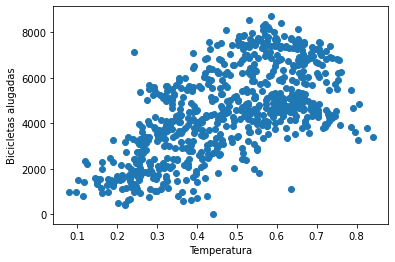

In [6]:
plt.scatter(dados['temperatura'], dados['bicicletas_alugadas'])
plt.xlabel('Temperatura')
plt.ylabel('Bicicletas alugadas')
plt.show()

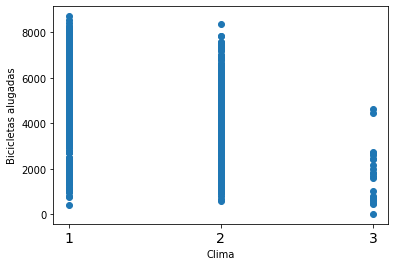

In [7]:
# CATEGÓRICA x NUMÉRICA - scatter
plt.scatter(dados['clima'], dados['bicicletas_alugadas'])
plt.xlabel('Clima')
plt.ylabel('Bicicletas alugadas')

indice = [1,2,3]
plt.xticks(indice, fontsize=14)
plt.show()

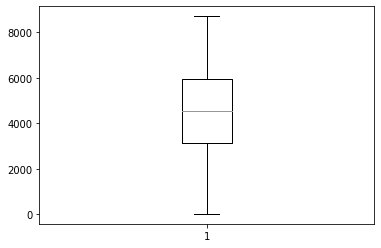

In [8]:
# CATEGÓRICA x NUMÉRICA - boxplot
plt.boxplot(dados['bicicletas_alugadas'], )
# plt.xlabel('Clima')
# plt.ylabel('Bicicletas alugadas')

# indice = [1,2,3]
# plt.xticks(indice, fontsize=14)
plt.show()

# Como mostrar vários boxplot em uma imagem

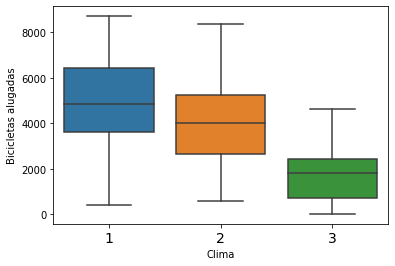

In [9]:
# CATEGÓRICA x NUMÉRICA - boxplot
sns.boxplot(data=dados, y='bicicletas_alugadas', x='clima')
plt.xlabel('Clima')
plt.ylabel('Bicicletas alugadas')

plt.xticks(fontsize=14)
plt.show()

## <font color=orange><b>Normalização</b></font>

In [25]:
y = dados['bicicletas_alugadas'].values
X = dados[['clima', 'temperatura']].values  # -> np.array

In [26]:
# Normalização: Máx - Mín [0 - 1]
X_maxs = np.amax(X, axis=0)
X_norm = X / X_maxs
print(X_norm)

[[0.66666667 0.43242565]
 [0.66666667 0.42066914]
 [0.33333333 0.22524188]
 ...
 [0.66666667 0.28826395]
 [0.33333333 0.27553942]
 [0.66666667 0.26577246]]


In [27]:
# Normalização: Máx - Mín [0 - 1]
y_norm = y / np.amax(y)

# <font color=orange><b>Estrutura das Redes Neurais</b></font>

## **FUNÇÕES DAS REDES**

* Cada valor das variáveis explicativas é multiplicado pelo PESO. 
* Depois são somados os produtos de todas variáveis obtendo um valor da SOMA em cada registro.
* Após isso, os valores da SOMA são processados pela FUNÇÃO DE ATIVAÇÃO, obtendo o valor da saída.

![Sigmoid](https://lh4.googleusercontent.com/efWc9RBhWUYYoYuqXhcQdjseIJ_r1_esW1muTDlcn73SJWjl9IUTX88SzYN3JKVdadXhJaBj6a_NAG-zPPwb_rWrJfdtiDz9AyPqAKkHLjK8mHOVnSwsv6iiYRHftydAF4YgCQvqTgoUg4wGQoqI_kTUOC1WLGd5lOl7VWrcOnyS66IsfKKWT3Ks7A)

In [28]:
def sigmoid(Soma):
    return 1 / (1 + np.exp(-Soma))

def relu(Soma):
    return np.maximum(0, Soma)

## <font color=orange>ARQUITETURA</font>

São contados como camadas a OCULTA e a SAÍDA.

![](https://lh3.googleusercontent.com/E5770rjjn5MwDYlF223vH9BFHUabRqgjBVD5_w803-b4AYBFt3otScCwEwXSs3TiZqUOzPnKVelJc80w7XUVlG1gb5itYvkJarJKRohHkFw_MaftLCEXr76Hvu04cXLt0qPcNj-NDNI4oWXS5C26PDayis-xfLwuULdotA9QBMR7NnFWRMcrEGKC6Q)

![](https://lh5.googleusercontent.com/5zo-cEpO2Hg04Ee_AqvRavZj1uCm72snjWQOZ0SkTK64v6ytHwHgbtmQ9bMyTRJOQBaXzca-myvyY2IhWBSQTcuoMHWR31ZnfYHAGUO94KBSZmufH8szs8TE0EXatC-i91uX1qoF5c4g56D_UUgyQaQaB6AqelTJERSnUvqdALjiRng6PAPBr6rf9g)

**PROPAGAÇÃO**

Uma rede neural é um conjunto de funções entre os dados de entradas, um conjuntos de *nodes* e uma saída esperada.

In [31]:
nodes = 3

arquitetura = [
    # ENTRADA=2 variáveis; SAÍDA: número de nodes, ATIVAÇÃO
    {'dim_entrada': 2, 'dim_saida': nodes, 'ativacao': 'relu'},
    # ENTRADA=3 nodes; SAÍDA: resposta esperada, ATIVAÇÃO
    {'dim_entrada': nodes, 'dim_saida': 1, 'ativacao': 'sigmoid'},
]

## <font color=orange>PESOS e VIESES</font>

Os pesos serão armazenados em matrizes.

![](https://lh3.googleusercontent.com/i1t1_Ae_bpjVc4Pnls2tgNE3tuW3IM5H2Up0oEaKWd-nTxSvmCMb1mb-mCIYAGtUFoGrJW_LHuQtqe3E2N-8eZuiCY3wJGbGbi5WCpbxP1UDSkPABxLah6dtt7_Ec6XlIMa0VMdGbhKXJ8lKUaMuXAEDWji5psX5RO4YJIE3U0EMV7cITehhT-JlEw)

![](https://lh4.googleusercontent.com/mFX3DR1ARHT8Sq70x7RLCyc-CJfpe7goRzXWyFO58jRHRsXwnikeMDq2Qi-1sqwEruMwtXG0ObO_v79UFPm7uw8mahGZx6vu_byEWKNeK_RswvNXLP4PZjNxmEh6HvS_nDDBeLnrhDjv3fUfGn-xg0E8gyr7ZBKPVNzpu8EXsB6udsskQvmUqQPK_w)

In [35]:
def inicia_camadas(arquitetura, seed=99):
    np.random.seed(seed)

    # A quantidde de camadas é o comprimento da arquitetura
    numero_de_camadas = len(arquitetura)

    valores_parametros = {}
    for indice, camada in enumerate(arquitetura):
        indice_camada = indice + 1

        tamanho_camada_entrada = camada['dim_entrada']
        tamanho_camada_saida = camada['dim_saida']

        # PESOS
        valor_randomico = np.random.randn(tamanho_camada_saida, tamanho_camada_entrada)
        valores_parametros['P' + str(indice_camada)] = valor_randomico

        # VIESES
        valor_randomico = np.random.randn(tamanho_camada_saida)
        valores_parametros['B' + str(indice_camada)] = valor_randomico

    return valores_parametros

In [36]:
inicia_camadas(arquitetura)

{'P1': array([[-0.14235884,  2.05722174],
        [ 0.28326194,  1.32981198],
        [-0.15462185, -0.06903086]]),
 'B1': array([ 0.75518049,  0.82564665, -0.11306921]),
 'P2': array([[-2.36783759, -0.16704943,  0.68539797]]),
 'B2': array([0.02350011])}

**PROPAGAÇÃO**


In [37]:
# A forma mais eficiente computacionalmente é através do cálculo de matrizes.
def propaga_uma_camada(Ativado_anterior, Pesos_atuais, b_atual, ativacao='relu'):
    Saida_atual = np.dor(Pesos_atuais, Ativado_anterior) + b_atual # multiplicação de matrizes

    if ativacao == 'relu':
        func_ativacao = relu
    if ativacao == 'sigmoide':
        func_ativacao = sigmoid

    return func_ativacao(Saida_atual)

In [ ]:
def propaga_total(X, valores_parametros, arquitetura):
    memoria = {}

    